# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
# !GET https://https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0?alt=media
# Authorization: Bearer <ACCESS_TOKEN>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as pl
import pylab as pl
import scipy as sp
from scipy import stats
import statsmodels.formula.api as smf
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
df_firearms_murder = pd.read_csv('World firearms murders and ownership - Sheet 1.csv')
df_GDP = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv')
df_world_population = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2.csv')
df_mass_shooting = pd.read_csv('data-pvLFI.csv')

In [4]:
df_firearms_murder.head(5)

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [5]:
df_GDP.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,1.946902e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,8.963316e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,1.192689e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN


In [6]:
df_GDP.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016'],
      dtype='object')

In [7]:
df_GDP = df_GDP[['Country Name','2012']]

In [8]:
df_GDP.head()

,Country Name,2012
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153984e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [9]:
df_world_population.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0
5,Arab World,ARB,"Population, total",SP.POP.TOTL,92490932.0,95044497.0,97682294.0,100411076.0,103239902.0,106174988.0,...,331653797.0,339825483.0,348145094.0,356508908.0,364895878.0,373306993.0,381702086.0,390043028.0,398304960.0,406452690.0
6,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,92634.0,101078.0,112472.0,125566.0,138529.0,150362.0,...,6044067.0,6894278.0,7666393.0,8270684.0,8672475.0,8900453.0,9006263.0,9070867.0,9154302.0,9269612.0
7,Argentina,ARG,"Population, total",SP.POP.TOTL,20619075.0,20953077.0,21287682.0,21621840.0,21953929.0,22283390.0,...,39970224.0,40382389.0,40799407.0,41223889.0,41656879.0,42096739.0,42539925.0,42981515.0,43417765.0,43847430.0
8,Armenia,ARM,"Population, total",SP.POP.TOTL,1874120.0,1941491.0,2009526.0,2077575.0,2144998.0,2211316.0,...,2933056.0,2908220.0,2888584.0,2877311.0,2875581.0,2881922.0,2893509.0,2906220.0,2916950.0,2924816.0
9,American Samoa,ASM,"Population, total",SP.POP.TOTL,20013.0,20486.0,21117.0,21882.0,22698.0,23520.0,...,57903.0,57030.0,56227.0,55637.0,55320.0,55230.0,55307.0,55437.0,55537.0,55599.0


In [10]:
df_world_population=df_world_population[['Country Name','2012']]

In [11]:
df_world_population.head(5)

,Country Name,2012
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [12]:
df_mass_shooting.head(5)

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [13]:
df = df_world_population.merge(df_mass_shooting, right_on="Country", left_on="Country Name")
df.head()

,Country Name,2012,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,22728254.0,Australia,15.0,4
1,Austria,8429991.0,Austria,30.4,1
2,Canada,34750545.0,Canada,30.8,4
3,Switzerland,7996861.0,Switzerland,45.7,2
4,Germany,80425823.0,Germany,30.3,7


In [14]:
df = df.merge(df_GDP, right_on = "Country Name", left_on ="Country Name")

In [15]:
df.head()

,Country Name,2012_x,Country,Guns/100 inhabitants,Number of mass shootings,2012_y
0,Australia,22728254.0,Australia,15.0,4,1.538194e+12
1,Austria,8429991.0,Austria,30.4,1,4.074516e+11
2,Canada,34750545.0,Canada,30.8,4,1.824289e+12
3,Switzerland,7996861.0,Switzerland,45.7,2,6.650541e+11
4,Germany,80425823.0,Germany,30.3,7,3.543984e+12


In [16]:
df_firearms_murder.columns

Index([u'Country/Territory', u'ISO code', u'Source',
       u'% of homicides by firearm', u'Number of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
       u'Rank by rate of ownership', u'Average firearms per 100 people',
       u'Average total all civilian firearms'],
      dtype='object')

In [17]:
df_firearms_murder.head(5)

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [18]:
df_firearms_murder.tail(10)

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
175,United Arab Emirates,AE,NaN,NaN,NaN,NaN,24.0,22.1,1000000.0
176,United States,US,CTS,60.0,9146.0,2.97,1.0,88.8,270000000.0
177,Uruguay,UY,CTS,46.5,93.0,2.80,9.0,31.8,1100000.0
178,Uzbekistan,UZ,NaN,NaN,NaN,NaN,133.0,1.5,1200000.0
179,Venezuela,VE,NGO,79.5,11115.0,38.97,59.0,10.7,2850000.0
180,Vietnam,VN,CTS,52.9,834.0,0.99,128.0,1.7,1100000.0
181,West Bank & Gaza,PS,CTS,72.4,105.0,2.95,118.0,3.4,125000.0
182,Yemen,YE,NaN,NaN,NaN,NaN,2.0,54.8,11500000.0
183,Zambia,ZM,National police,11.7,28.0,0.35,68.0,8.9,230000.0
184,Zimbabwe,ZW,CTS,65.6,598.0,4.78,106.0,4.4,400000.0


In [19]:
df_firearms_murder.rename(columns = {'Country/Territory' : 'Country Name'}, inplace=True)

In [20]:
df_firearms_murder["Number of homicides by firearm"]

0         56.0
1         20.0
2          NaN
3          1.0
4       1198.0
5          9.0
6         30.0
7         18.0
8         11.0
9         52.0
10         0.0
11      1456.0
12         8.0
13        12.0
14        70.0
15        68.0
16         NaN
17         0.0
18         NaN
19         NaN
20        18.0
21         NaN
22     34678.0
23         0.0
24        51.0
25         NaN
26         NaN
27       187.0
28         NaN
29       173.0
        ...   
155     8319.0
156       90.0
157      291.0
158        NaN
159        NaN
160        NaN
161       37.0
162       57.0
163        NaN
164      128.0
165       15.0
166        NaN
167        NaN
168        NaN
169      365.0
170        NaN
171      535.0
172        5.0
173      280.0
174      100.0
175        NaN
176     9146.0
177       93.0
178        NaN
179    11115.0
180      834.0
181      105.0
182        NaN
183       28.0
184      598.0
Name: Number of homicides by firearm, Length: 185, dtype: float64

In [21]:
df_firearms_murder.head(5)

,Country Name,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [22]:
df.head(5)

,Country Name,2012_x,Country,Guns/100 inhabitants,Number of mass shootings,2012_y
0,Australia,22728254.0,Australia,15.0,4,1.538194e+12
1,Austria,8429991.0,Austria,30.4,1,4.074516e+11
2,Canada,34750545.0,Canada,30.8,4,1.824289e+12
3,Switzerland,7996861.0,Switzerland,45.7,2,6.650541e+11
4,Germany,80425823.0,Germany,30.3,7,3.543984e+12


In [23]:
df_firearms_murder.head(5)

,Country Name,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [24]:
df = df.merge(df_firearms_murder, right_on ="Country Name", left_on = "Country Name")

In [25]:
df.head(5)

,Country Name,2012_x,Country,Guns/100 inhabitants,Number of mass shootings,2012_y,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Australia,22728254.0,Australia,15.0,4,1.538194e+12,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0
1,Austria,8429991.0,Austria,30.4,1,4.074516e+11,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0
2,Canada,34750545.0,Canada,30.8,4,1.824289e+12,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0
3,Switzerland,7996861.0,Switzerland,45.7,2,6.650541e+11,CH,CTS,72.2,57.0,0.77,3.0,45.7,3400000.0
4,Germany,80425823.0,Germany,30.3,7,3.543984e+12,DE,CTS/National police,26.3,158.0,0.19,15.0,30.3,25000000.0


In [26]:
df.head(5)

,Country Name,2012_x,Country,Guns/100 inhabitants,Number of mass shootings,2012_y,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Australia,22728254.0,Australia,15.0,4,1.538194e+12,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0
1,Austria,8429991.0,Austria,30.4,1,4.074516e+11,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0
2,Canada,34750545.0,Canada,30.8,4,1.824289e+12,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0
3,Switzerland,7996861.0,Switzerland,45.7,2,6.650541e+11,CH,CTS,72.2,57.0,0.77,3.0,45.7,3400000.0
4,Germany,80425823.0,Germany,30.3,7,3.543984e+12,DE,CTS/National police,26.3,158.0,0.19,15.0,30.3,25000000.0


In [27]:
df.columns

Index([u'Country Name', u'2012_x', u'Country', u'Guns/100 inhabitants',
       u'Number of mass shootings', u'2012_y', u'ISO code', u'Source',
       u'% of homicides by firearm', u'Number of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
       u'Rank by rate of ownership', u'Average firearms per 100 people',
       u'Average total all civilian firearms'],
      dtype='object')

In [28]:
df.rename(columns = {'2012_y' :'gdp', '2012_x' :'pop'}, inplace=True)

In [29]:
df.head(5)

,Country Name,pop,Country,Guns/100 inhabitants,Number of mass shootings,gdp,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Australia,22728254.0,Australia,15.0,4,1.538194e+12,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0
1,Austria,8429991.0,Austria,30.4,1,4.074516e+11,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0
2,Canada,34750545.0,Canada,30.8,4,1.824289e+12,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0
3,Switzerland,7996861.0,Switzerland,45.7,2,6.650541e+11,CH,CTS,72.2,57.0,0.77,3.0,45.7,3400000.0
4,Germany,80425823.0,Germany,30.3,7,3.543984e+12,DE,CTS/National police,26.3,158.0,0.19,15.0,30.3,25000000.0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


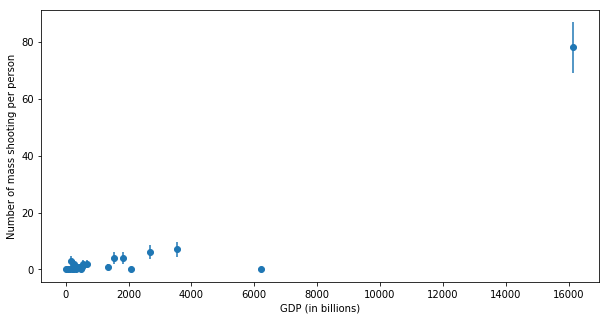

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [30]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [31]:
df.columns

Index([u'Country Name', u'pop', u'Country', u'Guns/100 inhabitants',
       u'Number of mass shootings', u'gdp', u'ISO code', u'Source',
       u'% of homicides by firearm', u'Number of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
       u'Rank by rate of ownership', u'Average firearms per 100 people',
       u'Average total all civilian firearms'],
      dtype='object')

In [32]:
df['average number of civilian fire armpp'] = df["Average firearms per 100 people"]* 1e3

In [33]:
df.head(5)

,Country Name,pop,Country,Guns/100 inhabitants,Number of mass shootings,gdp,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,average number of civilian fire armpp
0,Australia,22728254.0,Australia,15.0,4,1.538194e+12,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,15000.0
1,Austria,8429991.0,Austria,30.4,1,4.074516e+11,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,30400.0
2,Canada,34750545.0,Canada,30.8,4,1.824289e+12,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,30800.0
3,Switzerland,7996861.0,Switzerland,45.7,2,6.650541e+11,CH,CTS,72.2,57.0,0.77,3.0,45.7,3400000.0,45700.0
4,Germany,80425823.0,Germany,30.3,7,3.543984e+12,DE,CTS/National police,26.3,158.0,0.19,15.0,30.3,25000000.0,30300.0


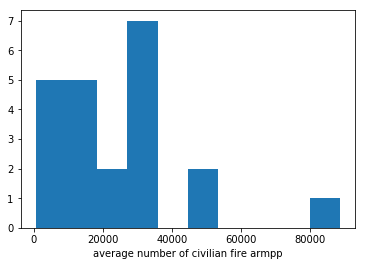

In [34]:
fig, ax = plt.subplots()
ax.hist(df['average number of civilian fire armpp'] )
ax.set_xlabel('average number of civilian fire armpp');




AttributeError: Unknown property bin

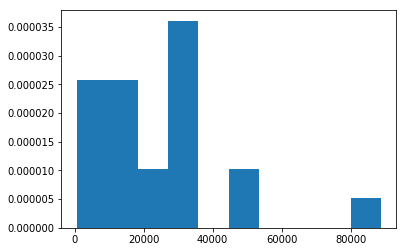

In [35]:
pl.hist(df['average number of civilian fire armpp'], bin = np.arange(0,20,0.5),normed=1)           
mid = 0.5*(bins[1:] + bins[:-1])
pl.errorbar(mid, n, yerr=0.01, fmt='none')

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

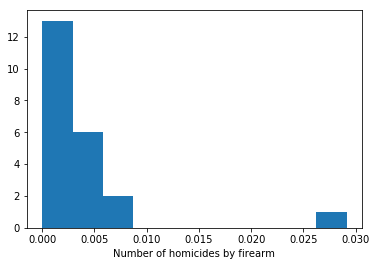

In [36]:
fig, ax = plt.subplots()
ax.hist(df['Number of homicides by firearm'] / df['pop'] * 1000)
ax.set_xlabel('Number of homicides by firearm');

In [37]:
# with error bar

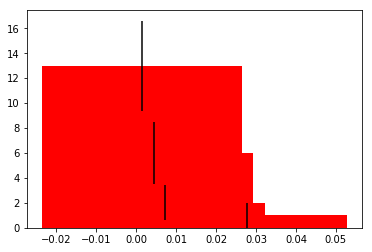

In [38]:
y,binEdges = np.histogram(df['Number of homicides by firearm'] / df['pop'] * 1000,bins=10)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
width      = 0.05
plt.bar(bincenters, y, width=width, color='r', yerr=menStd)
plt.show()


## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


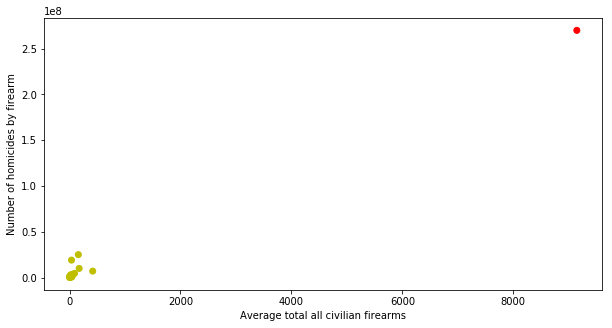

In [39]:
col = []
for i in range(len(df.axes[0])):
    if df["Country Name"][i] == "United States":
        col.append("r")
    else:
        col.append("y")
        
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Number of homicides by firearm'], df['Average total all civilian firearms'],color =col)
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()

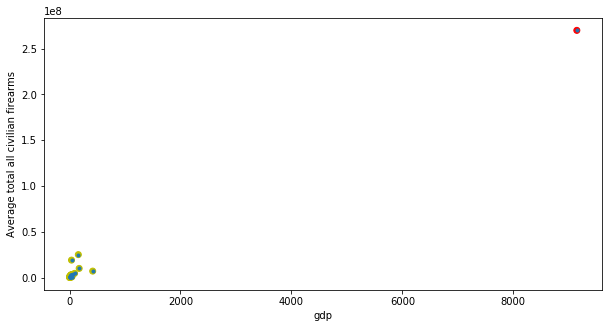

In [40]:
# with errorbar

col = []
for i in range(len(df.axes[0])):
    if df["Country Name"][i] == "United States":
        col.append("r")
    else:
        col.append("y")
        
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Number of homicides by firearm'], df['Average total all civilian firearms'],color =col)
ax.errorbar(df['Number of homicides by firearm'] , df['Average total all civilian firearms'], 
            yerr = np.sqrt(df['Average total all civilian firearms'] * 1.0), fmt = '.')
ax.set_xlabel("gdp")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.show()

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [41]:
df.columns

Index([u'Country Name', u'pop', u'Country', u'Guns/100 inhabitants',
       u'Number of mass shootings', u'gdp', u'ISO code', u'Source',
       u'% of homicides by firearm', u'Number of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
       u'Rank by rate of ownership', u'Average firearms per 100 people',
       u'Average total all civilian firearms',
       u'average number of civilian fire armpp'],
      dtype='object')

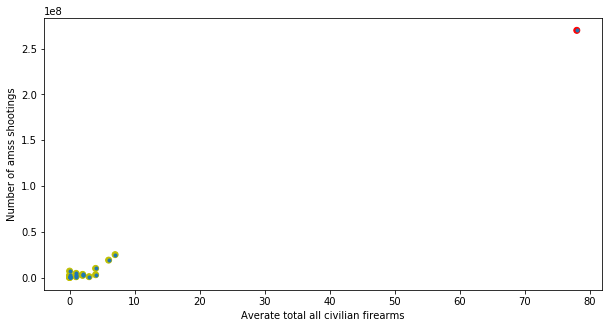

In [42]:
col = []
for i in range(len(df.axes[0])):
    if df["Country Name"][i] == "United States":
        col.append("r")
    else:
        col.append("y")
        
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Number of mass shootings'], df['Average total all civilian firearms'],color =col)
ax.errorbar(df['Number of mass shootings'] , df['Average total all civilian firearms'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("Averate total all civilian firearms")
ax.set_ylabel("Number of amss shootings")
ax.set_ylim()
pl.show()

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [43]:
mean(df["Number of mass shootings"] / df['pop'] * 1e3)

0.00012102125439686045

In [44]:
mean(df['Average total all civilian firearms']/df['pop'])

0.22895008572891778

In [52]:
df['shootingspp'] = (df["Number of mass shootings"] / df['pop'] * 1e3)/(1e-4)
df['firearmpp'] = (df['Average total all civilian firearms']/df['pop'])

In [53]:
lm = smf.ols(formula = 'shootingspp ~firearmpp ', data = df).fit()

In [54]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        18:08:20   Log-Likelihood:                -39.232
No. Observations:                  22   AIC:                             82.46
Df Residuals:                      20   BIC:                             84.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3149      0.515      0.612      0.548      -0.759       1.388
firearmpp      3.9106      1.754      2.230      0.037       0.252       7.569
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

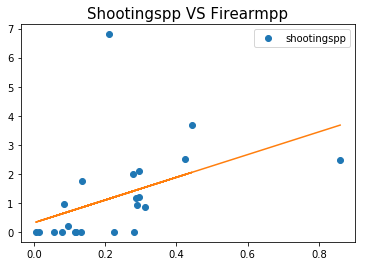

In [55]:
plt.plot(df['firearmpp'],df['shootingspp'],'o')
plt.title('Shootingspp VS Firearmpp', fontsize = 15)
plt.xlabel=("Firearmpp")
plt.ylabel=("Shootingspp")
plt.plot(df['firearmpp'], lm.predict(), '-')
plt.legend()

In [56]:
# WLS

In [57]:
wls_model = smf.WLS(endog = df['shootingspp'], exog =df['firearmpp'], weights=1/abs(lm.resid)).fit()
wls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.715
Model:                            WLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     52.61
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           3.82e-07
Time:                        18:08:21   Log-Likelihood:                -25.428
No. Observations:                  22   AIC:                             52.86
Df Residuals:                      21   BIC:                             53.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
firearmpp      4.3506      0.600      7.253      0.000       3.103       5.598
==============================================================================
Omnibus:                        3.868   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.837
Skew:                           0.879   Prob(JB):                        0.242
Kurtosis:                       2.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

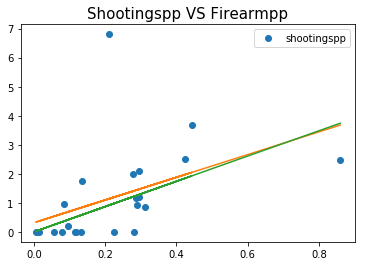

In [58]:
plt.plot(df['firearmpp'],df['shootingspp'],'o')
plt.title('Shootingspp VS Firearmpp', fontsize = 15)
plt.xlabel=("Firearmpp")
plt.ylabel=("Shootingspp")
plt.plot(df['firearmpp'], lm.predict(), '-')
plt.plot(df['firearmpp'], wls_model.predict(),'-')
plt.legend()

In [ ]:
# seaborn

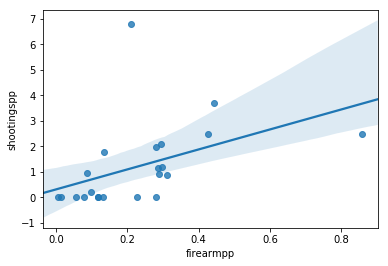

In [63]:
import seaborn as sns 
sns.regplot(x=df["firearmpp"], y=df["shootingspp"], data=df);

In [ ]:
# poly fit

In [90]:

poly_fit = np.polyfit(df["firearmpp"], df["shootingspp"], 1)
poly_fit


array([ 3.91060034,  0.31488026])

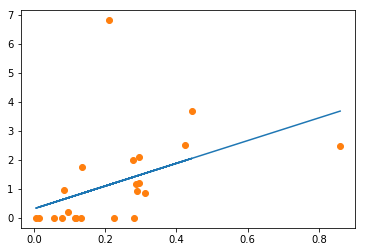

In [91]:
y = poly_fit[0]*(df['firearmpp'])+poly_fit[1]

# compose plot
plt.plot(df['firearmpp'],y)
plt.plot(df['firearmpp'],df['shootingspp'],'o')

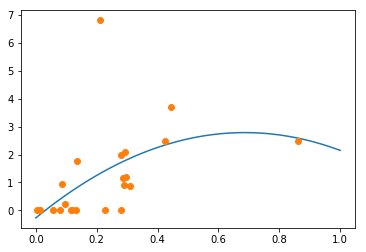

In [94]:
# for fun, run poly line, rather than line. because it's polyfit
x = linspace(0,1,100)
poly_fit = np.polyfit(df['firearmpp'], df["shootingspp"], 2)
poly_fit
y = poly_fit[0]*(x)**2+poly_fit[1]*(x)+poly_fit[2]

# compose plot
plt.plot(x,y)
plt.plot(df['firearmpp'],df['shootingspp'],'o')

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [ ]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [98]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        18:44:50   Log-Likelihood:                -39.232
No. Observations:                  22   AIC:                             82.46
Df Residuals:                      20   BIC:                             84.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3149      0.515      0.612      0.548      -0.759       1.388
firearmpp      3.9106      1.754      2.230      0.037       0.252       7.569
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
import statsmodels.graphics as smg


AttributeError: 'module' object has no attribute 'influence_plot'

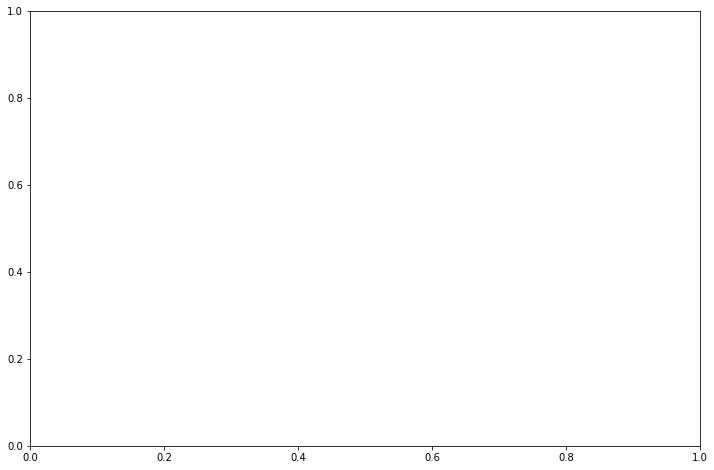

In [109]:
fig, ax = plt.subplots(figsize=(12,8))
fig = smg.influence_plot(lm, ax=ax, criterion="cooks")

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings